<a href="https://colab.research.google.com/github/Menon-Vineet/Python-Codes/blob/main/Efficient_SSSP_with_Interactive_Input_and_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

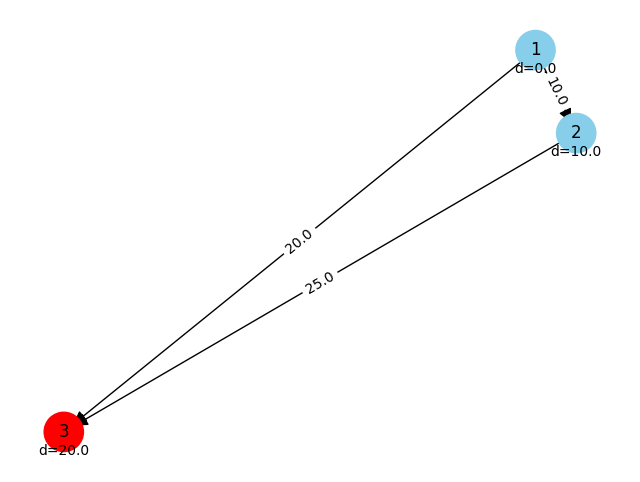


✅ Final shortest distances from source:
Node 1: 0.00
Node 2: 10.00
Node 3: 20.00


In [2]:
# 🚚 Efficient SSSP with User-Friendly 1-Indexed Input & Animation in Colab
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import time
from IPython.display import clear_output

class Graph:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.edges = []
        self.adj_list = {i: [] for i in range(num_nodes)}

    def add_edge(self, u, v, weight):
        self.edges.append((u, v, weight))
        self.adj_list[u].append((v, weight))

class EfficientSSSP:
    def __init__(self, graph):
        self.graph = graph
        self.distances = [float('inf')] * graph.num_nodes
        self.previous = [None] * graph.num_nodes
        self.visited_nodes = []

    def run(self, source):
        self.distances[source] = 0
        visited = [False] * self.graph.num_nodes
        queue = [(0, source)]

        while queue:
            current_distance, u = heapq.heappop(queue)
            if visited[u]:
                continue
            visited[u] = True
            self.visited_nodes.append((u, current_distance))

            for v, weight in self.graph.adj_list[u]:
                if self.distances[v] > current_distance + weight:
                    self.distances[v] = current_distance + weight
                    self.previous[v] = u
                    heapq.heappush(queue, (self.distances[v], v))

        return self.distances, self.previous

def draw_graph(graph, distances=None, path=None, highlight_node=None):
    G = nx.DiGraph()
    G.add_weighted_edges_from(graph.edges)
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    node_colors = []
    for node in G.nodes():
        if node == highlight_node:
            node_colors.append('red')
        elif path and node in path:
            node_colors.append('lightgreen')
        else:
            node_colors.append('skyblue')

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_labels(G, pos, labels={n: str(n+1) for n in G.nodes()})
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if distances:
        dist_labels = {i: f"{d:.1f}" if d != float('inf') else "∞" for i, d in enumerate(distances)}
        for node, (x, y) in pos.items():
            plt.text(x, y - 0.1, f"d={dist_labels[node]}", fontsize=10, ha='center', color='black')

    plt.axis('off')
    plt.show()

def animate_sssp(graph, sssp):
    for idx, (node, _) in enumerate(sssp.visited_nodes):
        clear_output(wait=True)
        draw_graph(graph, distances=sssp.distances, highlight_node=node)
        time.sleep(1)

# ✅ USER-FRIENDLY INPUT SECTION (1-based index support)
try:
    num_nodes = int(input("Enter number of nodes: "))
    num_edges = int(input("Enter number of edges: "))
    edges = []

    print("Now enter edges one at a time in the format: from_node to_node weight")
    for i in range(num_edges):
        u, v, w = input(f"Edge {i+1}: ").strip().split()
        u, v = int(u) - 1, int(v) - 1  # Convert to 0-based
        edges.append((u, v, float(w)))

    source_node = int(input("Enter the source node: ")) - 1

    if source_node < 0 or source_node >= num_nodes:
        raise ValueError("Source node must be within range!")

    graph = Graph(num_nodes)
    for u, v, w in edges:
        graph.add_edge(u, v, w)

    sssp = EfficientSSSP(graph)
    distances, previous = sssp.run(source_node)

    animate_sssp(graph, sssp)

    print("\n✅ Final shortest distances from source:")
    for i, d in enumerate(distances):
        label = f"Node {i+1}"
        print(f"{label}: {d:.2f}" if d != float('inf') else f"{label}: ∞")

except Exception as e:
    print("❌ Error in input or processing:", str(e))
